Naive Bayes Model - Accuracy: 97.73%


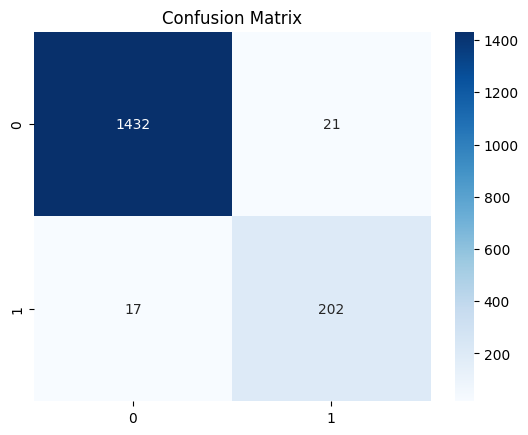

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1453
           1       0.91      0.92      0.91       219

    accuracy                           0.98      1672
   macro avg       0.95      0.95      0.95      1672
weighted avg       0.98      0.98      0.98      1672


Enter the email content to predict whether it's spam or not:
Congratulations! You have won a lottery. Claim your prize now.
Prediction: Spam


In [4]:
# Install necessary libraries
!pip install pandas numpy scikit-learn seaborn matplotlib

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('/content/sample_data/spam.csv', encoding='ISO-8859-1')

# Rename necessary columns for clarity
df = df.rename(columns={'v1': 'label', 'v2': 'text'})

# Convert labels to binary values (1 for spam, 0 for ham)
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

# Split the data into features (X) and labels (y)
X = df['text']
y = df['label']

# Convert text data into numerical features using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')  # Remove common words (stop words)
X_vec = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.3, random_state=42)

# Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_test)

# Accuracy and Confusion Matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display Results
print(f'Naive Bayes Model - Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix Plot
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Function for predicting a single input
def predict_spam():
    print("\nEnter the email content to predict whether it's spam or not:")
    email_text = input()
    email_vec = vectorizer.transform([email_text])  # Transform user input
    prediction = nb_model.predict(email_vec)[0]

    if prediction == 1:
        print("Prediction: Spam")
    else:
        print("Prediction: Not Spam")

# Call the function to predict user input
predict_spam()
